In [1]:
#!pip install yfinance (yahoo)
#!pip install finta (Financial Technical Analysis)
#pip install pmdarima
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
tsla = yf.Ticker("TSLA")
data = pd.read_csv('static/data/newteslaclean.csv')

In [3]:
#data = yf.download("TSLA", start="2010-06-10", end="2020-02-03")

In [4]:
data.shape

(2416, 8)

   Unnamed: 0        date  openprice  highestprice  lowestprice  closingprice  \
0           0  2010-06-29  19.000000         25.00    17.540001     23.889999   
1           1  2010-06-30  25.790001         30.42    23.299999     23.830000   
2           2  2010-07-01  25.000000         25.92    20.270000     21.959999   
3           3  2010-07-02  23.000000         23.10    18.709999     19.200001   
4           4  2010-07-06  20.000000         20.00    15.830000     16.110001   

   adjustedclosingprice    volume  
0             23.889999  18766300  
1             23.830000  17187100  
2             21.959999   8218800  
3             19.200001   5139800  
4             16.110001   6866900  


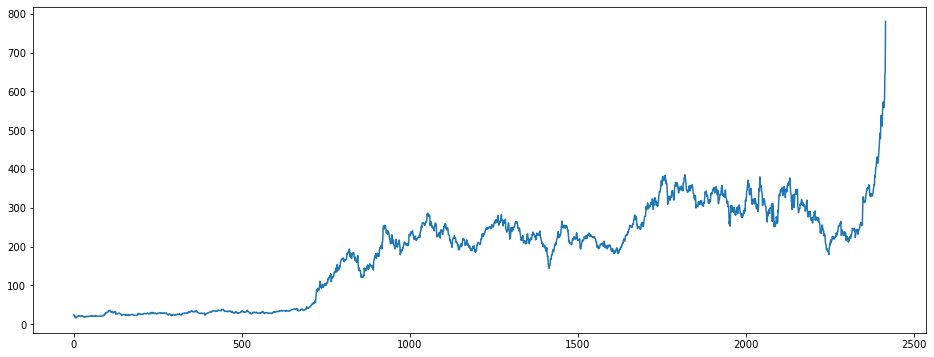

In [5]:
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Adj Close':'adj close','Volume': 'volume', 'Open': 'open'}, inplace=True)
print(data.head())

data['closingprice'].plot(figsize=(16,6))

#tmp = data.iloc[-11000:]
#tmp['close'].plot()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2416 non-null   int64  
 1   date                  2416 non-null   object 
 2   openprice             2416 non-null   float64
 3   highestprice          2416 non-null   float64
 4   lowestprice           2416 non-null   float64
 5   closingprice          2416 non-null   float64
 6   adjustedclosingprice  2416 non-null   float64
 7   volume                2416 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 151.1+ KB


In [7]:
#7 day rolling mean
data.rolling(7).mean().head(20)

,Unnamed: 0,openprice,highestprice,lowestprice,closingprice,adjustedclosingprice,volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,20.761429,22.655714,18.028571,19.750000,19.750000,1.011600e+07
7,4.0,20.558571,21.641428,17.887142,18.822857,18.822857,8.013757e+06
8,5.0,19.438571,19.877143,16.987143,17.854286,17.854286,5.873100e+06
9,6.0,18.351428,18.837143,16.505714,17.308571,17.308571,5.081857e+06


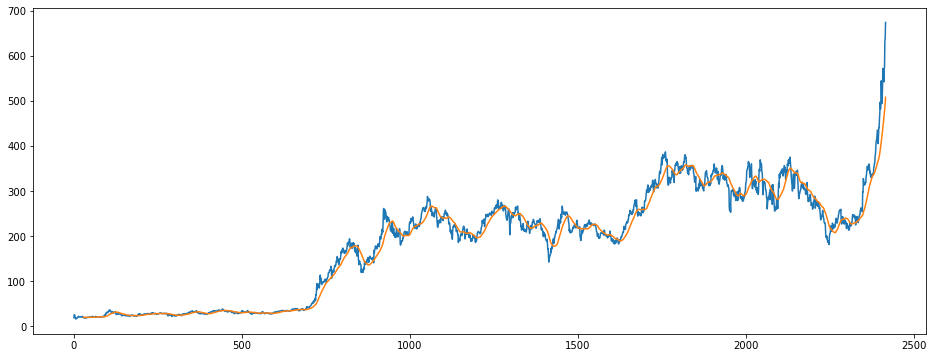

In [8]:
#to get and display the moving average for the past 30 days
data['openprice'].plot(figsize=(16,6))
data.rolling(window=30).mean()['closingprice'].plot()

In [9]:
training_set=data['openprice']
training_set=pd.DataFrame(training_set)

In [10]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
#creating a data structure
X_train = []
y_train = []

for i in range (60,2416):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [12]:
#RNN (Recurrent Neural Network) and LSTM (Long Short Term Memory)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [13]:
#Initializing RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [54]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
74/74 [==============================] - 14s 77ms/step - loss: 8.1274e-04
Epoch 2/50
74/74 [==============================] - 7s 88ms/step - loss: 7.8843e-04
Epoch 3/50
74/74 [==============================] - 7s 95ms/step - loss: 7.8779e-04
Epoch 4/50
74/74 [==============================] - 11s 148ms/step - loss: 7.6403e-04
Epoch 5/50
74/74 [==============================] - 6s 84ms/step - loss: 6.8851e-04
Epoch 6/50
74/74 [==============================] - 5s 73ms/step - loss: 5.5117e-04
Epoch 7/50
74/74 [==============================] - 5s 71ms/step - loss: 6.5758e-04
Epoch 8/50
74/74 [==============================] - 6s 74ms/step - loss: 7.8140e-04
Epoch 9/50
74/74 [==============================] - 8s 114ms/step - loss: 6.2408e-04
Epoch 10/50
74/74 [==============================] - 5s 72ms/step - loss: 6.7280e-04
Epoch 11/50
74/74 [==============================] - 5s 71ms/step - loss: 6.2384e-04
Epoch 12/50
74/74 [==============================] - 5s 68ms/step - lo

In [55]:
#!pip install pandas-datareader

In [56]:
#tesla = yf.download("TSLA", start='2010-06-29', end="2020-04-03")
from pandas_datareader import data as pdr

tesla = pdr.get_data_yahoo("TSLA", start="2010-06-29", end="2020-02-03")

tesla.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
print(tesla.head())

             high    low   open  close    volume  Adj Close
Date                                                       
2010-06-29  5.000  3.508  3.800  4.778  93831500      4.778
2010-06-30  6.084  4.660  5.158  4.766  85935500      4.766
2010-07-01  5.184  4.054  5.000  4.392  41094000      4.392
2010-07-02  4.620  3.742  4.600  3.840  25699000      3.840
2010-07-06  4.000  3.166  4.000  3.222  34334500      3.222


In [57]:
tesla.shape

(2416, 6)

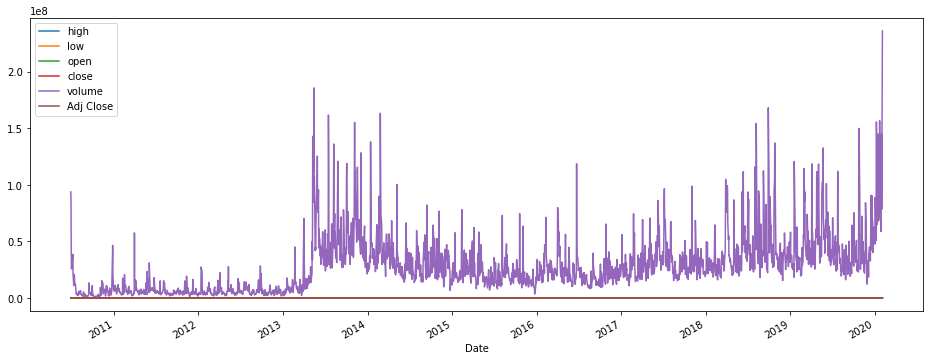

In [58]:
tesla.plot(figsize=(16,6))

In [59]:
data_test = tesla

In [60]:
data_total = pd.concat((data['openprice'], data['openprice']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [61]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   high       2416 non-null   float64
 1   low        2416 non-null   float64
 2   open       2416 non-null   float64
 3   close      2416 non-null   float64
 4   volume     2416 non-null   int64  
 5   Adj Close  2416 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


In [62]:
#tesla['date'] = pd.date_range(start='06/29/2010', periods=len(tesla), freq='D')
#tesla['date']=pd.to_datetime(tesla['date'])


In [63]:
tesla.info

<bound method DataFrame.info of                   high         low        open       close     volume  \
Date                                                                    
2010-06-29    5.000000    3.508000    3.800000    4.778000   93831500   
2010-06-30    6.084000    4.660000    5.158000    4.766000   85935500   
2010-07-01    5.184000    4.054000    5.000000    4.392000   41094000   
2010-07-02    4.620000    3.742000    4.600000    3.840000   25699000   
2010-07-06    4.000000    3.166000    4.000000    3.222000   34334500   
...                ...         ...         ...         ...        ...   
2020-01-28  115.362000  111.615997  113.697998  113.379997   58942500   
2020-01-29  117.959999  113.486000  115.138000  116.197998   89007500   
2020-01-30  130.175995  123.599998  126.484001  128.162003  145028500   
2020-01-31  130.600006  126.503998  128.000000  130.113998   78596500   
2020-02-03  157.227997  134.703995  134.738007  156.000000  236167500   

             Adj C

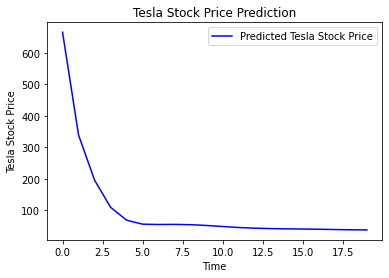

In [64]:
# Visualising the results
#plt.plot(tesla, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

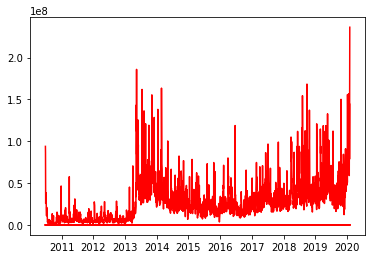

In [65]:
plt.plot(tesla, color = 'red', label = 'Real Tesla Stock Price')